**1. IMPORT DATA DAN MELAKUKAN INSPEKSI**

In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('\nInfo dataset:')
df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


**Data Cleansing**

In [ ]:
#merubah ke tipe data datetime

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


**Churn Customers**


Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah :

*   transaksi paling terakhir kapan dilakukan

*   klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.




In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print('Transaksi Terakhir')
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('\nInfo dataset:')
print(df.info())

Transaksi Terakhir
2019-02-01 23:57:57.286000013

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB
None


In [ ]:
print('Lima data teratas:')
df.head()

Lima data teratas:


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


**MENGHAPUS KOLOM YANG TIDAK DIBUTUHKAN**

In [ ]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False


**2. VISUALISASI DATA**

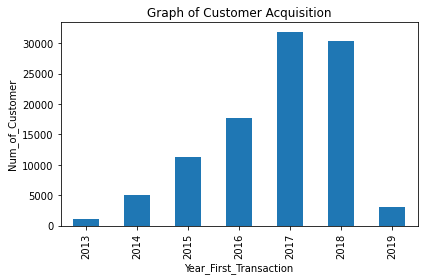

In [ ]:
#Graph of Customer Acquisition

import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

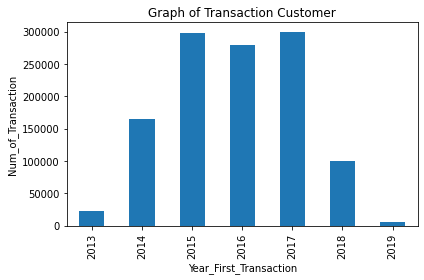

In [ ]:
#Graph of Transaction Customer

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

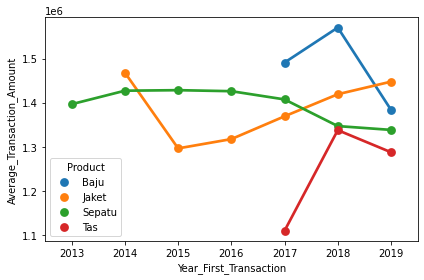

In [ ]:
# Average transaction amount by year

import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(), 
                                x='Year_First_Transaction',
                                y='Average_Transaction_Amount',
                                hue='Product')

plt.tight_layout()
plt.show()

In [ ]:
#Proporsi churned customer untuk setiap produk

import matplotlib.pyplot as plt

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
    columns='Product',
    values='Customer_ID',
    aggfunc='count',
    fill_value=0)

df_piv

Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
False,1268,11123,16064,4976
True,2144,23827,33090,7508


In [ ]:
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).index

plot_product

Index(['Tas', 'Sepatu', 'Jaket', 'Baju'], dtype='object', name='Product')

<Figure size 432x288 with 0 Axes>

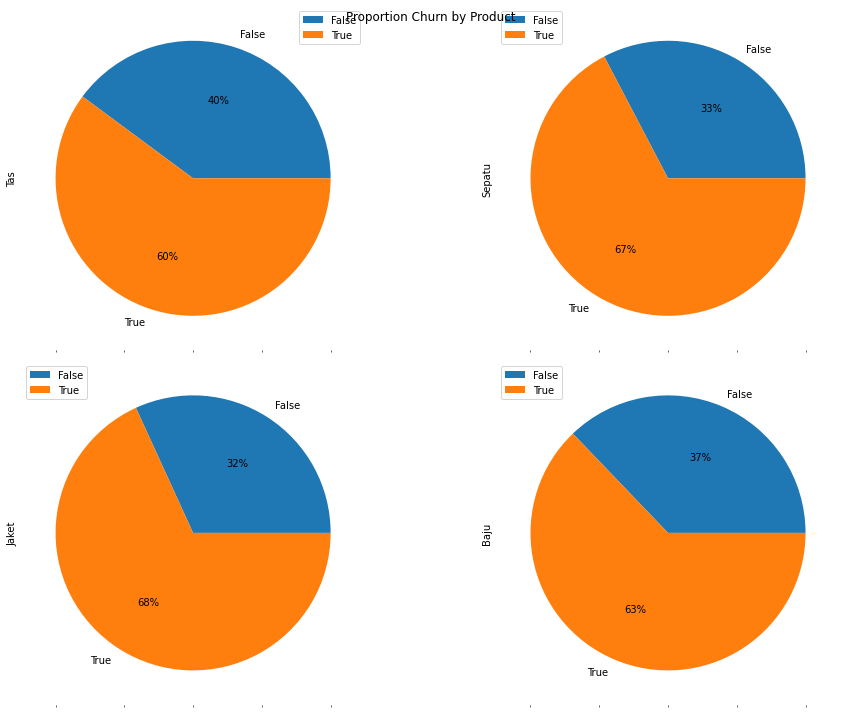

In [ ]:
# Plot pie chartnya
plt.clf()
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
figsize=(15, 10),
layout=(-1, 2),
autopct='%1.0f%%',
title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

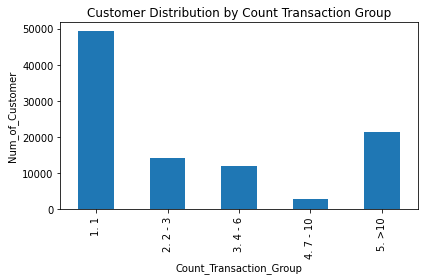

In [ ]:
#Distribusi kategorisasi count transaction

import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

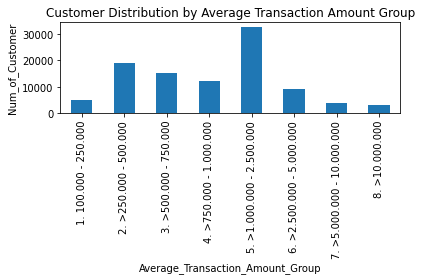

In [ ]:
#Distribusi kategorisasi average transaction amount

plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

**3. Feature Columns dan Target**

In [ ]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn'].astype('int') 

In [ ]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,False,2016,2018,5. >10,5. >1.000.000 - 2.500.000,2
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,False,2014,2018,5. >10,5. >1.000.000 - 2.500.000,4
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019,5. >10,2. >250.000 - 500.000,2
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,False,2017,2019,5. >10,3. >500.000 - 750.000,2
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,False,2015,2018,5. >10,5. >1.000.000 - 2.500.000,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Customer_ID                       100000 non-null  int64         
 1   Product                           100000 non-null  object        
 2   First_Transaction                 100000 non-null  datetime64[ns]
 3   Last_Transaction                  100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount        100000 non-null  int64         
 5   Count_Transaction                 100000 non-null  int64         
 6   is_churn                          100000 non-null  object        
 7   Year_First_Transaction            100000 non-null  int64         
 8   Year_Last_Transaction             100000 non-null  int64         
 9   Count_Transaction_Group           100000 non-null  object        
 10  Average_Transaction_Amount_Group 

In [ ]:
#Split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
#import numpy as np
#from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
#LE = LabelEncoder()
#df['is_churn'] = LE.fit_transform(df['is_churn'])
#print(LE.classes_)
#print(np.sort(df['is_churn'].unique()))
#print('')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

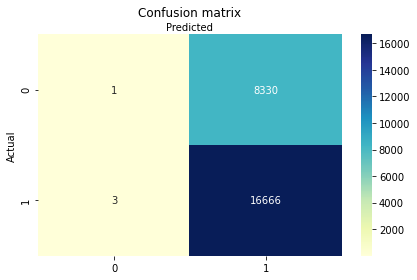

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
